## Introduction

### The project is based on Covid analysis and hospitals and covid testing labs available in the neighbourhood of Ernakulam.
### We will touch upon the Population Data, Total Active cases and Hospital/Lab data

In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install beautifulsoup4
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install geopy
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install opencage

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=2b91650b8272fdeba4658796f998380d9953112b8c10d88b20191edaf5d1681b
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
     |████████████████████████████████| 93 kB 2.8 MB/s  eta 0:00:01


In [2]:
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import requests
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt


# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


## Data Mining

### We will source data from various sources mentioned in the presentation, webscape them, convert to csv and produce meaningful output

In [3]:
CLIENT_ID = 'RIDPSGIWJCOTQ5GR4JTTQFR2Z443ENXY0OECDFYD0TLFXA1M' # your Foursquare ID
CLIENT_SECRET = 'G3B3OC04AXXO3WLSEK52LINUPNOKFBGUFCJA1JOQSJTJYA4T' # your Foursquare Secret
VERSION = '20201111'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RIDPSGIWJCOTQ5GR4JTTQFR2Z443ENXY0OECDFYD0TLFXA1M
CLIENT_SECRET:G3B3OC04AXXO3WLSEK52LINUPNOKFBGUFCJA1JOQSJTJYA4T


### Population Data for Kerala (2018 Survey)

In [156]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_districts_of_Kerala'
html_text = requests.get(wiki_url).text

In [157]:
# Extract the table data using BeautifulSoup
soup = BeautifulSoup(html_text)
table = soup.find('table', attrs={'class':'wikitable sortable'})
trs = table.find_all('tr')
print("Number of rows in the table(including columns header): ",
      len(trs))

# Extract the text from all the table cells and add all rows
# to a list of rows.
rows = list()
for tr in trs:
    td = tr.find_all('td')
    row = [ele.text.strip() for ele in td]
    if row:
        # Ignore empty rows with no 'td',
        # applicable for the column headers row.
        rows.append(row)

print("Number of rows with data in the table: ", len(rows))

Number of rows in the table(including columns header):  16
Number of rows with data in the table:  14


In [158]:
df_Popu = pd.DataFrame(rows,columns=['Code', 'District', 'Headquaters', 'Established', 'Population','Area' , 'Subdivisions', 'Location'])
df_Popu.head(20)

,Code,District,Headquaters,Established,Population,Area,Subdivisions,Location
0,AL,Alappuzha,Alappuzha,17 Aug 1957[7],"2,146,033","1,415 km2 (546 sq mi)",Ambalapuzha (Alappuzha)\nChengannur\nCherthala...,
1,ER,Ernakulam,Kakkanad,1 Apr 1958[8],"3,427,659","3,063 km2 (1,183 sq mi)",Aluva\nKanayannur (Ernakulam)\nKochi (Fort Koc...,
2,ID,Idukki,Painavu,26 Jan 1972[10][11],"1,093,156","4,356 km2 (1,682 sq mi)",Devikulam\nPeermade\nUdumbanchola (Nedumkandam...,
3,KN,Kannur,Kannur,1 Jan 1957[12],"2,615,266","2,961 km2 (1,143 sq mi)",Thalassery\nIritty\nKannur\nThalipparamba\nPay...,
4,KS,Kasaragod,Kasaragod,24 May 1984[13][14],"1,390,894","1,989 km2 (768 sq mi)",Manjeshwaram (Uppala)\nKasaragod\nVellarikundu...,
5,KL,Kollam,Kollam,1 Nov 1956[16] ( 1 July 1949)[17][18],"2,659,431","2,483 km2 (959 sq mi)","Kollam (Paravur, Chathannoor)\nKarunagappally\...",
6,KT,Kottayam,Kottayam,1 Nov 1956[20] (1 July 1949 )[17],"1,983,573","2,206 km2 (852 sq mi)",Changanasserry\nKanjirappally\nKottayam\nVaiko...,
7,KZ,Kozhikode,Kozhikode,1 Jan 1957[22],"3,249,761","2,345 km2 (905 sq mi)",Kozhikode\nThamarassery\nKoyilandy\nVatakara[23],
8,MA,Malappuram,Malappuram,16 Jun 1969[24],"4,494,998","3,554 km2 (1,372 sq mi)",Nilambur\nManjeri (Eranad)\nKondotty\nPerintha...,
9,PL,Palakkad,Palakkad,1 Jan 1957[25],"2,952,254","4,482 km2 (1,731 sq mi)",Alathur\nChittur\nPalakkad\nPattambi\nOttappal...,


### We only require District and respective Population numbers, data cleansed.

In [171]:
df_density=pd.read_csv('https://raw.githubusercontent.com/SreeramRK/sreerk/main/DATAPOPUL.csv')
df_density

,District,Population
0,Malappuram,"44,94,998.00"
1,Ernakulm,"34,27,659.00"
2,Thiruvananthapuram,"33,55,148.00"
3,Kozhikode,"32,49,761.00"
4,Thrissur,"32,43,170.00"
5,Palakkad,"29,52,254.00"
6,Kollam,"26,59,431.00"
7,Kannur,"26,15,266.00"
8,Alappuzha,"21,46,033.00"
9,Kottayam,"19,83,573.00"


### Total Active cases across Kerala

In [35]:
df_Activ = pd.read_csv("https://raw.githubusercontent.com/SreeramRK/sreerk/main/CovidSTATA.csv")
# View the top rows of the dataset
df_Activ

,District,Confirmed,Recovered,Active,Death
0,Thiruvananthapuram,65252,57553,7174,478
1,Malappuram,59086,52155,6749,173
2,Kozhikode,57065,48789,8111,158
3,Ernakulm,54942,44899,9849,183
4,Thrissur,49296,40260,8865,166
5,Kollam,40051,34381,5527,136
6,Alappuzha,39993,31643,8211,123
7,Palakkad,30980,24267,6645,66
8,Kottayam,28790,23921,4804,63
9,Kannur,28355,23394,4823,133


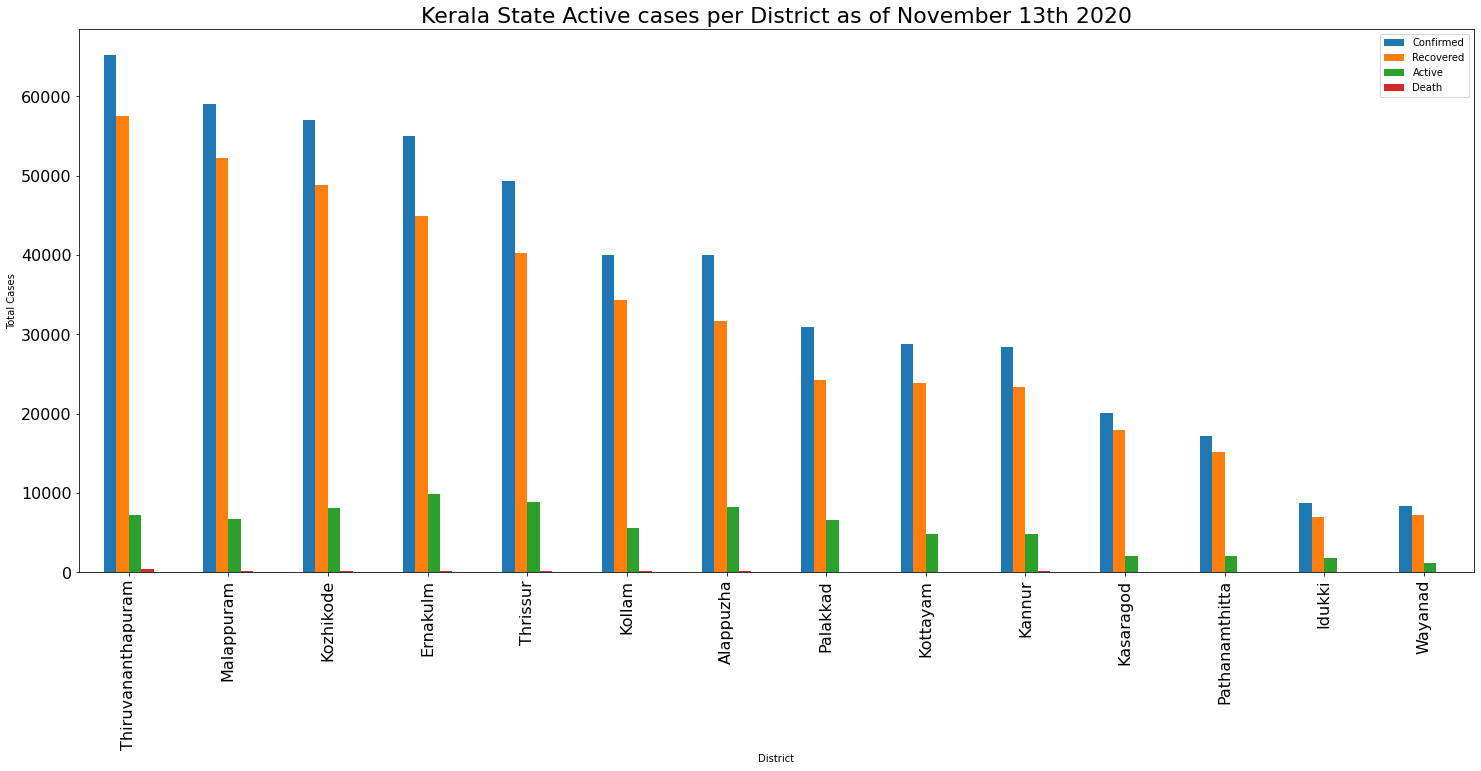

In [58]:
df_Activ.plot(kind='bar', figsize=(25, 10), fontsize=16)

plt.xlabel('District') # add to x-label to the plot
plt.ylabel('Total Cases') # add y-label to the plot
plt.title('Kerala State Active cases per District as of November 13th 2020',fontsize=22) # add title to the plot

plt.show()

### We choose to explore Ernakulam ( Commercial Capital of Kerala) - Hospital Data sourcing for Ernakulam

In [36]:
web_url = 'https://www.medicineindia.org/hospitals-in-state/kerala'
html2_text = requests.get(web_url).text

In [37]:
# Extract the table data using BeautifulSoup
soup = BeautifulSoup(html2_text)
table = soup.find('table', attrs={'class':'table table-striped'})
trs = table.find_all('tr')


# Extract the text from all the table cells and add all rows
# to a list of rows.
rows = list()
for tr in trs:
    td = tr.find_all('td')
    row = [ele.text.strip() for ele in td]
    if row:
        # Ignore empty rows with no 'td',
        # applicable for the column headers row.
        rows.append(row)

print("Number of Hospitals across all over Kerala: ", len(rows))

Number of Hospitals across all over Kerala:  256


### We see we have total of 256 Hospitals all over Kerala

### Below shows the available hospitals in Ernakulam District (57)

In [38]:
df_Hosp = pd.read_csv("https://raw.githubusercontent.com/SreeramRK/sreerk/main/HospDATAEranakulam.csv")
# View the top rows of the dataset
df_Hosp

,Hospital Name,State,District
0,A.M. Hospital,Kerala,Ernakulam
1,A.P.Varkey Mission Hospital,Kerala,Ernakulam
2,Aditya Eye Hospital,Kerala,Ernakulam
3,Alexander Eye Centre,Kerala,Ernakulam
4,Alpha Ent Head And Neck Research Institute And...,Kerala,Ernakulam
5,Alphonsa Hospital,Kerala,Ernakulam
6,Bharath Rural Hospital & Training Centre,Kerala,Ernakulam
7,Bishop Alapatt Mission Hospital,Kerala,Ernakulam
8,Carmel Hospital,Kerala,Ernakulam
9,Chaitanya Ent Hospital,Kerala,Ernakulam


### Active Covid testing Laboratories across Ernakulam (69)

In [39]:
df_Labs = pd.read_csv("https://raw.githubusercontent.com/SreeramRK/sreerk/main/LABORATORYDATAEranakulamcochin.csv")
# View the top rows of the dataset
df_Labs

,SL NO,Labs,District
0,1,DDRC SRL Diagnostics Pvt Ltd,Ernakulam
1,2,Medivision Scan & Diagnostic Research Centre P...,Ernakulam
2,3,Neuberg Diagnostics Private Limited,Ernakulam
3,4,Lab Services of Amrita Institute of Medical Sc...,Ernakulam
4,5,Amrita Institute of Medical Science,Ernakulam
...,...,...,...
64,65,Ernakulam Medical Centre Hospital (P) Ltd,Ernakulam
65,66,Meditech Diagnostic Centre,Ernakulam
66,67,Vimala Hospital,Ernakulam
67,68,Muvattupuzha Co-operative Super Speciality Hos...,Ernakulam


## That Brings the End of Data Mining 

## Methodology 

#### Lets find the Latitude and Longitude of Kerala using geolocator. 

In [41]:
from opencage.geocoder import OpenCageGeocode
key = '2223e32bd9c340aab4b7808134cb61f0'
geocoder = OpenCageGeocode(key)
query = 'Kerala, India'  
results = geocoder.geocode(query)
# print (results)
# Isolate only the Latitude & Longitude of Kerala 
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']
print ('The Latitude and Longitude of Kerala is {} and {} reprectively.'.format(lat, lng))

The Latitude and Longitude of Kerala is 10.3528744 and 76.5120396 reprectively.


### Lets find out the Lat and Long details for Each district from the Active case dataframe.

In [42]:
# Get latitude and longitude of all districts
list_lat = []   # create empty lists for latitude
list_long = []  # create empty lists for longitude
for index, row in df_Activ.iterrows(): # iterate over rows in dataframe
    District = row['District']       
    query = str(District)+', Kerala'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)
# create new columns from lists    
df_Activ['Latitude'] = list_lat   
df_Activ['Longitude'] = list_long
df_Activ

,District,Confirmed,Recovered,Active,Death,Latitude,Longitude
0,Thiruvananthapuram,65252,57553,7174,478,8.524112,76.936057
1,Malappuram,59086,52155,6749,173,11.106845,76.109955
2,Kozhikode,57065,48789,8111,158,11.258608,75.778874
3,Ernakulm,54942,44899,9849,183,10.416670,76.500000
4,Thrissur,49296,40260,8865,166,10.525626,76.213254
5,Kollam,40051,34381,5527,136,8.887951,76.595501
6,Alappuzha,39993,31643,8211,123,9.488707,76.415214
7,Palakkad,30980,24267,6645,66,10.769199,76.651247
8,Kottayam,28790,23921,4804,63,9.628738,76.645533
9,Kannur,28355,23394,4823,133,11.876225,75.373804


### Lets repeat the above for Hospital Data for Ernakulam district

In [43]:
# Get the latitude and longitude of all of the specialist hospitals
list2_lat = []   # create empty lists for latitude
list2_long = []  # create empty lists for longitude
for index, row in df_Hosp.iterrows(): # iterate over rows in dataframe
    hosp = row['Hospital Name']
    distr = row['District']       
    query = str(hosp) + ', ' + str(distr) + ', Kerala'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list2_lat.append(lat)
    list2_long.append(long)
# create new columns from lists    
df_Hosp['Latitude'] = list2_lat   
df_Hosp['Longitude'] = list2_long
df_Hosp

,Hospital Name,State,District,Latitude,Longitude
0,A.M. Hospital,Kerala,Ernakulam,10.000000,76.500000
1,A.P.Varkey Mission Hospital,Kerala,Ernakulam,9.885814,76.447058
2,Aditya Eye Hospital,Kerala,Ernakulam,10.034005,76.333141
3,Alexander Eye Centre,Kerala,Ernakulam,10.007807,76.315683
4,Alpha Ent Head And Neck Research Institute And...,Kerala,Ernakulam,10.000000,76.500000
5,Alphonsa Hospital,Kerala,Ernakulam,10.226539,76.383334
6,Bharath Rural Hospital & Training Centre,Kerala,Ernakulam,10.180705,76.205713
7,Bishop Alapatt Mission Hospital,Kerala,Ernakulam,10.000000,76.500000
8,Carmel Hospital,Kerala,Ernakulam,10.090557,76.362071
9,Chaitanya Ent Hospital,Kerala,Ernakulam,10.018994,76.310638


### Lat and Long details for Covid testig Labs in Ernakulam

In [50]:
# Get the latitude and longitude of all of the specialist hospitals
list2_lat = []   # create empty lists for latitude
list2_long = []  # create empty lists for longitude
for index, row in df_Labs.iterrows(): # iterate over rows in dataframe
    hosp = row['Labs']
    distr = row['District']       
    query = str(hosp) + ', ' + str(distr) + ', Kerala'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list2_lat.append(lat)
    list2_long.append(long)
# create new columns from lists    
df_Labs['Latitude1'] = list2_lat   
df_Labs['Longitude1'] = list2_long
df_Labs

,SL NO,Labs,District,Latitude1,Longitude1
0,1,DDRC SRL Diagnostics Pvt Ltd,Ernakulam,10.000000,76.500000
1,2,Medivision Scan & Diagnostic Research Centre P...,Ernakulam,10.000000,76.500000
2,3,Neuberg Diagnostics Private Limited,Ernakulam,10.000000,76.500000
3,4,Lab Services of Amrita Institute of Medical Sc...,Ernakulam,10.000000,76.500000
4,5,Amrita Institute of Medical Science,Ernakulam,10.000000,76.500000
...,...,...,...,...,...
64,65,Ernakulam Medical Centre Hospital (P) Ltd,Ernakulam,10.000000,76.500000
65,66,Meditech Diagnostic Centre,Ernakulam,10.000000,76.500000
66,67,Vimala Hospital,Ernakulam,10.144605,76.424672
67,68,Muvattupuzha Co-operative Super Speciality Hos...,Ernakulam,10.000000,76.500000


## Data Visualisation on Map showing Ernakulam District

In [44]:
map_Ekm = folium.Map(location=[10.051969,76.315773], zoom_start=12)
map_Ekm

In [46]:
map_hosp = folium.Map(location=[10.05, 76.31], zoom_start=12)
for lat, lng, Labs in zip(df_Hosp['Latitude'], df_Hosp['Longitude'], df_Hosp['Hospital Name']):
    label = folium.Popup(hosp, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=hosp,
        icon=folium.Icon(color='pink', tiles='Stamen Terrain',  icon='header'),
        ).add_to(map_hosp)      
map_hosp

In [98]:
map_Labs = folium.Map(location=[10.05, 76.31], zoom_start=12)
for lat, lng, Labs in zip(df_Labs['Latitude1'], df_Labs['Longitude1'], df_Labs['Labs']):
    label = folium.Popup(Labs, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=Labs,
        icon=folium.Icon(color='red', tiles='Stamen Terrain',  icon='plus'),
        ).add_to(map_Labs)      
map_Labs

In [97]:
map_hosplab = folium.Map(location=[10.05, 76.31], zoom_start=12)
for lat, lng, Labs in zip(df_Hosp['Latitude'], df_Hosp['Longitude'], df_Hosp['Hospital Name']):
    label = folium.Popup(hosp, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=hosp,
        icon=folium.Icon(color='pink', tiles='Stamen Terrain',  icon='header'),
        ).add_to(map_hosplab)      
map_hosplab
# Construct a map of all existing Covid-19 testing hospitals in Jakarta 
for lat, lng, Labs in zip(df_Labs['Latitude1'], df_Labs['Longitude1'], df_Labs['Labs']):
    label = folium.Popup(Labs, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=Labs,
        icon=folium.Icon(color='red', tiles='Stamen Terrain',  icon='plus'),
        ).add_to(map_hosplab)      
map_hosplab

## Aster Medcity is the largest hospital in South India, Lets explore its neighbourhood

### Figuring out the Lattitude and Longitude details for Aster Medcity

In [173]:
prop_neighborhood = pd.DataFrame({
   'Labs':['Aster Medcity']
})
neighborhood_latitude_list = []   # create empty lists for latitude
neighborhood_longitude_list = []  # create empty lists for longitude
for index, row in prop_neighborhood.iterrows(): # iterate over rows in dataframe
    neigh = row['Labs']  
    query = str(neigh) + ', Ernakulam'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    neighborhood_latitude_list.append(lat)
    neighborhood_longitude_list.append(long)
# create new columns from lists    
prop_neighborhood['Latitude'] = neighborhood_latitude_list   
prop_neighborhood['Longitude'] = neighborhood_longitude_list
prop_neighborhood

,Labs,Latitude,Longitude
0,Aster Medcity,10.043392,76.277687


In [174]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
neighborhood_latitude = 0
neighborhood_longitude = 0
address = 'Aster Medcity, Ernakulam'
geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
neighborhood_latitude= location.latitude
neighborhood_longitude= location.longitude
print("Aster Medcity: ", neighborhood_latitude, ",",neighborhood_longitude)

Aster Medcity:  10.0433916 , 76.27768743301267


### Getting the URL using Foursqaure for Aster Medcity

In [176]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius in meter
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
 CLIENT_ID, 
 CLIENT_SECRET, 
 VERSION, 
 neighborhood_latitude, 
 neighborhood_longitude, 
 radius, 
 LIMIT)
# url — not printed

In [188]:
# Send the GET request and examine the resutls
results = requests.get(url).json()
# results - not printed

### Lets explore the venues

In [179]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Paragon,Restaurant,10.043019,76.278439


### Only 1 Venue resulted and hence it will bring to the end of our methodology 

In [180]:
# Check how many venues were returned by Foursquare?
print('{} venues were returned by Foursquare for {} neighborhood.'.format(nearby_venues.shape[0], prop_neighborhood.iloc[0,0]))

1 venues were returned by Foursquare for Aster Medcity neighborhood.


## Results

 Post analysis findings/results:
 Kerala has overall 5.2L confirmed cases, 70k active, 4.5L recovered & 1.8k deaths. 
 
 Population density – Malappuram has the highest and Wayand has the lowest. 
 
 Ernakulam have total of 57 Hospitals & 69 testing centers. 
 
 Ernakulam have overall – 9.3k Active covid cases. 
 
 Analysis shows the city is well equipped by hospitals to accommodate covid patients.
 
 The large number of testing centres show the preparedness to do fast and rigorous testing.
 
 With a current medical infrastructure it is to be assumed that a vaccine distribution for 34.5L population is a seamlessly achievable target within a short span of time. 


## Conclusion

The project passes through different sections from Data Mining, Data processing, Data Cleansing, Methodology, Data Analysis and clustering. The neighborhood for Aster Medcity Hospital (the largest in South India) was explored using foursquare. 
The results obtained are for illustrative purposes only, this should not be used to make any real life decision as there might be variations on the accuracy of the data though they are sourced from internet web. 
The overall Data science journey has been very exciting, it prepares me well to take on major projects and further studies to sharpen the skills required for a Data Scientist.
Finally, we conclude on the medical preparedness and infrastructure availability for Ernakulam which definitely shows the positive side of the tough times the world is going through. 
With government measures and preparedness for the anticipated vaccine arrival soon we should be able to get back to the new normal. 
The results shown here is targeted for anyone living or traveling to the city to find nearest hospital or a testing laboratory which is a must have for inter-state and international travels.


## Thank You